In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

In [2]:
def json_reader(file):
    readin = pd.read_json(file, lines=True)[1][0]
    return pd.DataFrame(readin)

In [3]:
iraq_urban = json_reader("outside_data/urban.json")[["date", "value"]]
iraq_urban.columns = ["Year", "Population"]

In [4]:
iraq_urban["Year"] = iraq_urban["Year"].astype(int)
iraq_urban["Population"] = iraq_urban["Population"].astype(float)

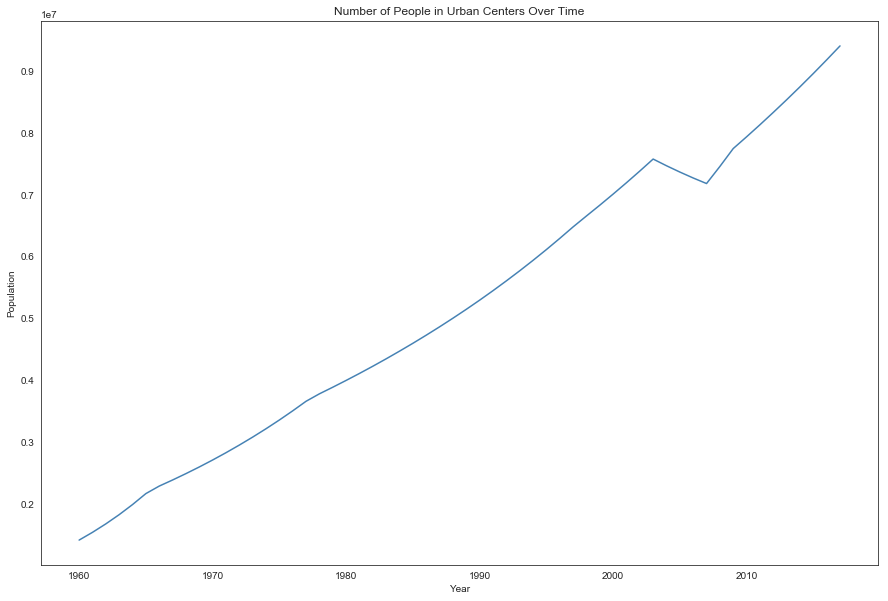

In [5]:
plt.figure(figsize=(15,10))
sns.lineplot(x = "Year", y= "Population", data = iraq_urban, color="steelblue")
plt.title("Number of People in Urban Centers Over Time")
plt.savefig('urban_num.png')

In [6]:
iraq_urban_percent = json_reader("outside_data/urban_percent.json")[["date", "value"]]
iraq_urban_percent.columns = ["Year", "Percent"]

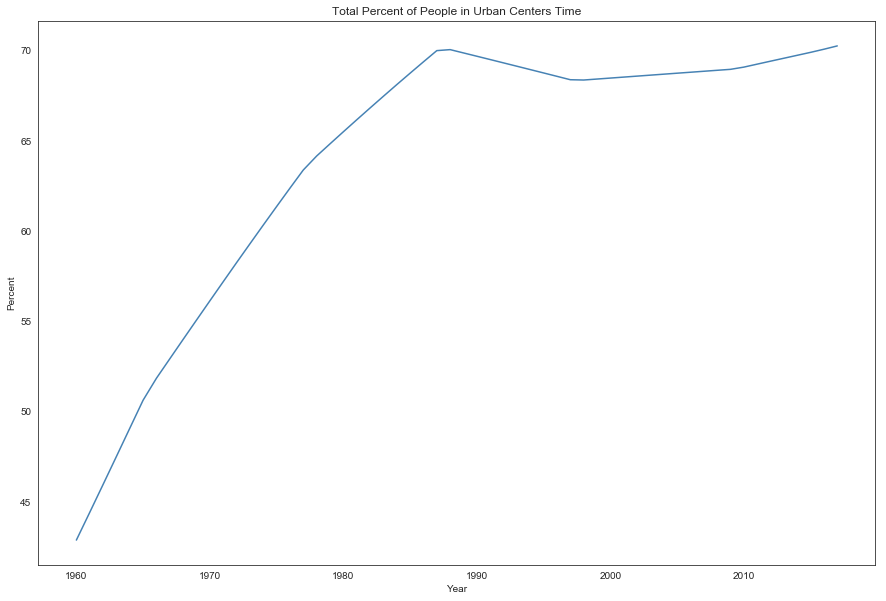

In [7]:
plt.figure(figsize=(15,10))
iraq_urban_percent["Year"] = iraq_urban_percent["Year"].astype(int)
iraq_urban_percent["Percent"] = iraq_urban_percent["Percent"].astype(float)

sns.lineplot(x = "Year", y= "Percent", data = iraq_urban_percent, color="steelblue")
plt.title("Total Percent of People in Urban Centers Time")
plt.savefig('urban_percent.png')

In [8]:
agricultural_land = json_reader("outside_data/agr.json")[["date", "value"]]
agricultural_land.columns = ["Year", "Land (sq. km)"]

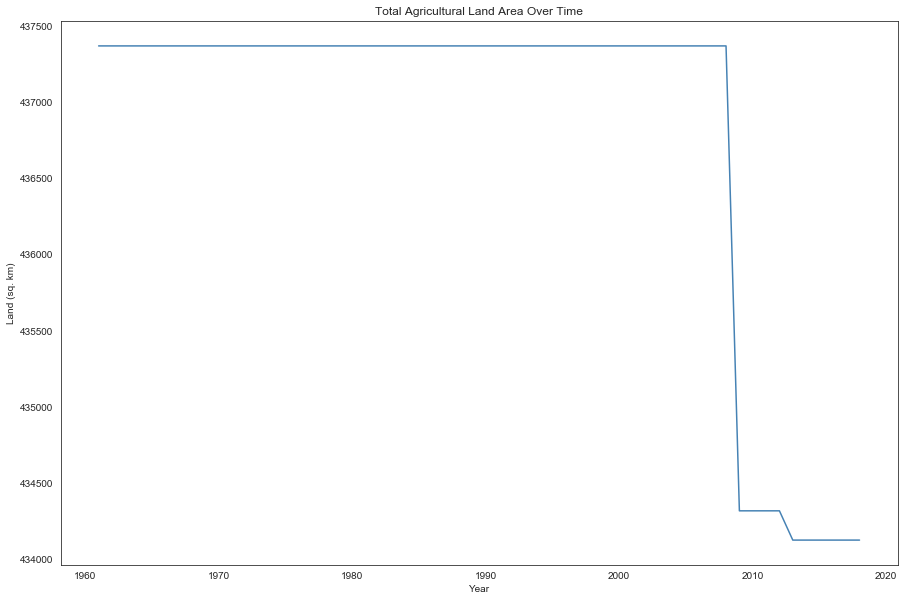

In [9]:
plt.figure(figsize=(15,10))
agricultural_land["Year"] = agricultural_land["Year"].astype(int)
agricultural_land["Land (sq. km)"] = agricultural_land["Land (sq. km)"].astype(float)

sns.lineplot(x = "Year", y= "Land (sq. km)", data = agricultural_land, color="steelblue")
plt.title("Total Agricultural Land Area Over Time")
plt.savefig('agriculture_land.png')

In [10]:
pop_density = json_reader("outside_data/density.json")[["date", "value"]]
pop_density.columns = ["Year", "Density (people per sq. km of land area)"]
pop_density["Year"] = pop_density["Year"].astype(int)
pop_density["Density (people per sq. km of land area)"] = pop_density["Density (people per sq. km of land area)"].astype(float)

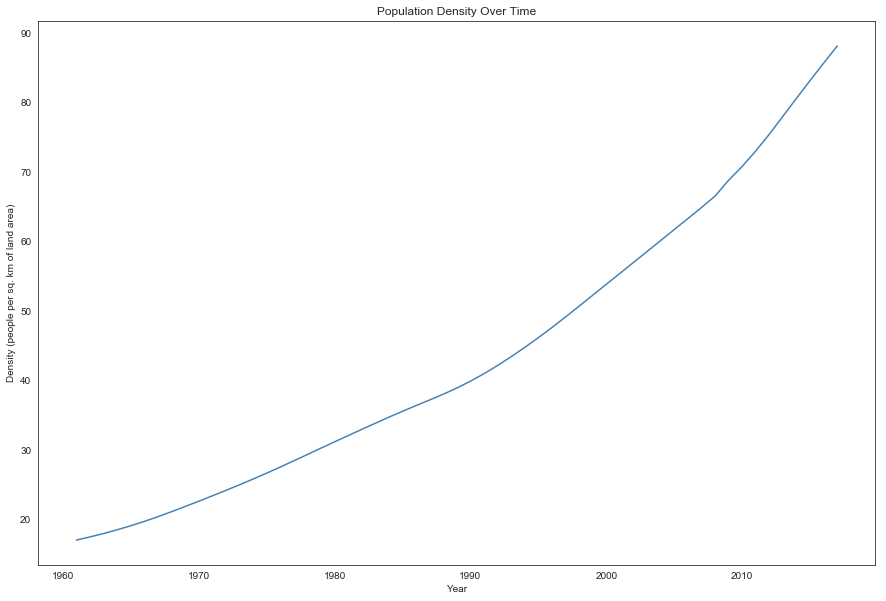

In [11]:
plt.figure(figsize=(15,10))
sns.lineplot(x = "Year", y= "Density (people per sq. km of land area)", data = pop_density, color="steelblue")
plt.title("Population Density Over Time")
plt.savefig('population_density.png')

In [19]:
x = np.array(pop_density["Year"])[1:len(np.array(pop_density["Year"])) - 1]
y = np.log(np.array(pop_density["Density (people per sq. km of land area)"])[1:(len(pop_density["Density (people per sq. km of land area)"]) - 1)])
params = np.polyfit(x, y, 1)
params

array([ 2.87594443e-02, -5.35337952e+01])

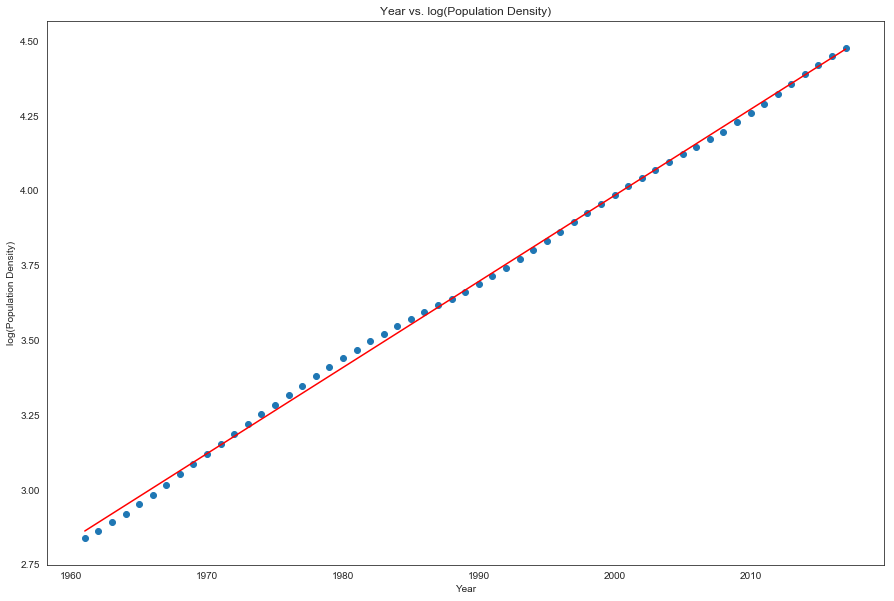

In [25]:
plt.figure(figsize=(15,10))
plt.scatter(x =x, y=y)
def eq(val):
    return val * params.item(0) + params.item(1)
sns.lineplot(x, eq(x), color="red")
plt.title("Year vs. log(Population Density)")
plt.ylabel("log(Population Density)")
plt.xlabel("Year")
plt.savefig("log_density.jpg")

In [54]:
len(y)

47

In [51]:
len(pop_density["Density (people per sq. km of land area)"])

59

In [49]:
np.array(pop_density["Density (people per sq. km of land area)"])[1:(len(x) - 1)]

array([88.16436008, 85.69493636, 83.19124394, 80.63538719, 78.04874228,
       75.46640956, 73.04994704, 70.82957497, 68.83093572, 66.56015959,
       64.91170634, 63.3283307 , 61.75189428, 60.17012827, 58.5948419 ,
       57.0210554 , 55.44881679, 53.87981114, 52.30847109, 50.73564716,
       49.17870682, 47.66191783, 46.20432814, 44.80700322, 43.46872671,
       42.20268194, 41.02411002, 39.94102248, 38.96058257, 38.07258614,
       37.24569358, 36.43682694, 35.61377095, 34.76576125, 33.89759014,
       33.01165832, 32.11592016, 31.21694675, 30.31254773, 29.40095114,
       28.49055491, 27.59258294, 26.71557034, 25.86438256, 25.03867664,
       24.23541852, 23.44903171, 22.67641356, 21.9164003 ])

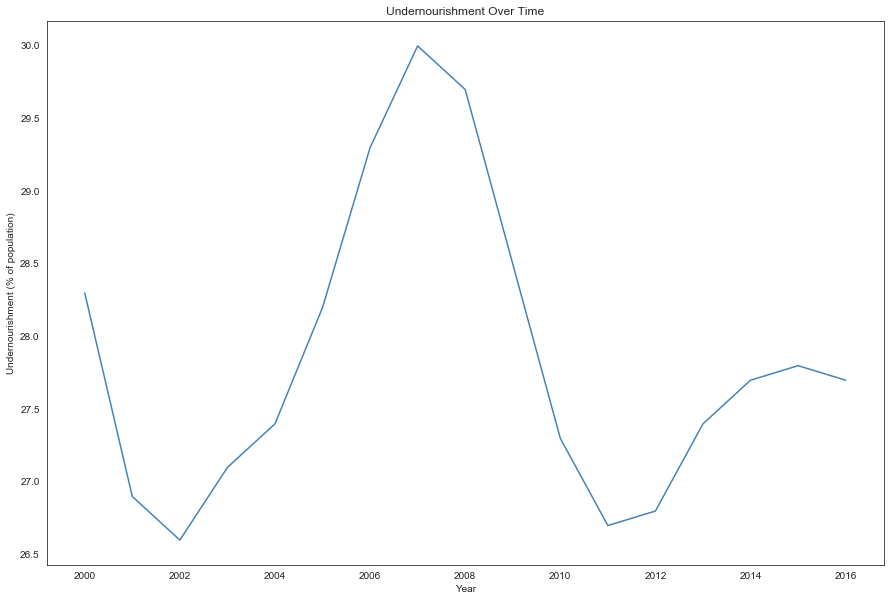

In [13]:
plt.figure(figsize=(15,10))
malnourishment = json_reader("outside_data/malnourishment.json")[["date", "value"]]
malnourishment.columns = ["Year", "Undernourishment (% of population)"]
malnourishment["Year"] = pop_density["Year"].astype(int)
malnourishment["Undernourishment (% of population)"] = malnourishment["Undernourishment (% of population)"].astype(float)

sns.lineplot(x = "Year", y= "Undernourishment (% of population)", data = malnourishment, color="steelblue")
plt.title("Undernourishment Over Time")
plt.savefig('undernourishment.png')

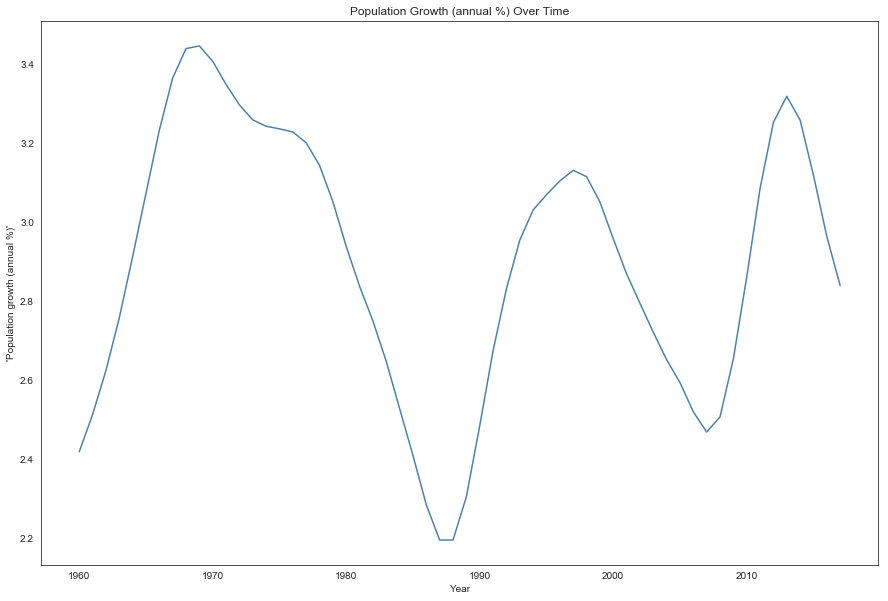

In [14]:
plt.figure(figsize=(15,10))
population = json_reader("outside_data/pop.json")[["date", "value"]]
population.columns = ["Year", "'Population growth (annual %)'"]
population["Year"] = pop_density["Year"].astype(int)
population["'Population growth (annual %)'"] = population["'Population growth (annual %)'"].astype(float)

sns.lineplot(x = "Year", y= "'Population growth (annual %)'", data = population, color="steelblue")
plt.title("Population Growth (annual %) Over Time")
plt.savefig('pop_growth.png')

In [18]:
right_tables = [population,
pop_density,
agricultural_land,
iraq_urban_percent]

In [19]:
merged = iraq_urban
for i in right_tables:
    merged = merged.merge(i, on="Year")

In [23]:
filled_data = merged.drop([0, 58])
filled_data.head()

,Year,Population,'Population growth (annual %)',Density (people per sq. km of land area),Land (sq. km),Percent
1,2017,9407171.0,2.840906,88.164360,434128.007812,70.278
2,2016,9181846.0,2.965164,85.694936,434128.007812,70.094
3,2015,8961453.0,3.120450,83.191244,434128.007812,69.921
4,2014,8746777.0,3.260407,80.635387,434128.007812,69.758
5,2013,8537372.0,3.320373,78.048742,434128.007812,69.595
